# LogLikelihood difference

This examples demonstrates how visualize the difference in LogLikelihood (LL) values obtained by LAC procedure for different software and parameter combinations.

## Get the data

First, run the example as described in the README. Then load the produced .csv file:

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


df = pd.read_csv("run/likelihood.csv", sep=";")
df.rename(columns={'likelihood': 'LL', 'ms' : 'max-strikes', 'sb' : 'strike-box', 'mp': 'max-pitches', 'o': 'omega'}, inplace=True)
df.head()

,pruning,g,query,length,LL,software,max-strikes,strike-box,max-pitches,red,ar,k,omega
0,0,0.01,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39708.145904,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.10,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39705.898393,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.01,ea4a29b8b59fb031b08cf1a7575658013dd45baa-9896769,0,-39779.279980,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0.10,ea4a29b8b59fb031b08cf1a7575658013dd45baa-9896769,0,-39778.547272,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0.01,64463bb954837427bbaa8bff6de57ba4bbaccb8b-9717282,0,-39791.397634,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What software was tested:

In [199]:
print(df["software"].unique())

['epa' 'epang' 'pplacer' 'rappas']


## Calculate LL-difference

Let's take a look at the LL values, produced by EPA: 

In [200]:
df_epa = df[df["software"] == "epa"]
df_epa.head()

,pruning,g,query,length,LL,software,max-strikes,strike-box,max-pitches,red,ar,k,omega
0,0,0.01,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39708.145904,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.10,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39705.898393,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.01,ea4a29b8b59fb031b08cf1a7575658013dd45baa-9896769,0,-39779.279980,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0.10,ea4a29b8b59fb031b08cf1a7575658013dd45baa-9896769,0,-39778.547272,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0.01,64463bb954837427bbaa8bff6de57ba4bbaccb8b-9717282,0,-39791.397634,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'Log Likelihood of extended trees')

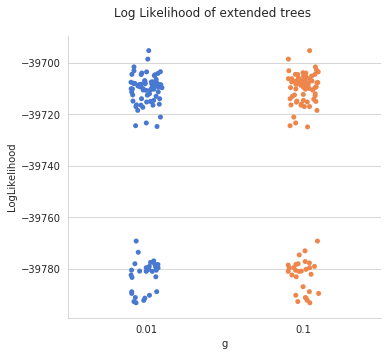

In [201]:
ax = sns.catplot(data=df_epa, x="g", y="LL", palette="muted")
ax.set_axis_labels("g", "LogLikelihood")
plt.subplots_adjust(left=0.1, top=0.9)
ax.fig.suptitle("Log Likelihood of extended trees")

Let's compare LL values query-by-query, taking the [EPA, g=0.1] run as baseline.

In [202]:
baseline = df_epa[df_epa["g"] == 0.1][["query", "LL"]].copy()
baseline.sort_values("query", inplace=True)
baseline.head()

,query,LL
73,0425c2f49866ff47d2d6678dfad027644b20dc0d-1708795,-39792.713826
121,07a16500d8ec9d9ff772b852d5b12fcc67185e0c-1296378,-39706.944825
9,07c4ff61b0b704a6e3e2aee860c9d10447abe20f-5648814,-39715.289683
81,07db0d6f4e199b4015f4c81eace27063926865ad-1635504,-39707.965122
13,0dbcba127f79ff6ec9aa56486685d702f1da0ca7-4235956,-39793.188953


In [203]:
df_epa = df_epa.merge(baseline, left_on="query", right_on="query", suffixes=('', '_baseline'))
df_epa.head()

,pruning,g,query,length,LL,software,max-strikes,strike-box,max-pitches,red,ar,k,omega,LL_baseline
0,0,0.01,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39708.145904,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39705.898393
1,0,0.10,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39705.898393,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39705.898393
2,0,0.01,ea4a29b8b59fb031b08cf1a7575658013dd45baa-9896769,0,-39779.279980,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39778.547272
3,0,0.10,ea4a29b8b59fb031b08cf1a7575658013dd45baa-9896769,0,-39778.547272,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39778.547272
4,0,0.01,64463bb954837427bbaa8bff6de57ba4bbaccb8b-9717282,0,-39791.397634,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39791.397634


In [204]:
df_epa["LL difference"] = df_epa["LL"] - df_epa["LL_baseline"]
df_epa.head()

,pruning,g,query,length,LL,software,max-strikes,strike-box,max-pitches,red,ar,k,omega,LL_baseline,LL difference
0,0,0.01,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39708.145904,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39705.898393,-2.247511
1,0,0.10,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39705.898393,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39705.898393,0.000000
2,0,0.01,ea4a29b8b59fb031b08cf1a7575658013dd45baa-9896769,0,-39779.279980,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39778.547272,-0.732708
3,0,0.10,ea4a29b8b59fb031b08cf1a7575658013dd45baa-9896769,0,-39778.547272,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39778.547272,0.000000
4,0,0.01,64463bb954837427bbaa8bff6de57ba4bbaccb8b-9717282,0,-39791.397634,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39791.397634,0.000000


Text(0.5, 0.98, 'Log Likelihood difference (vs. EPA, g=0.1)')

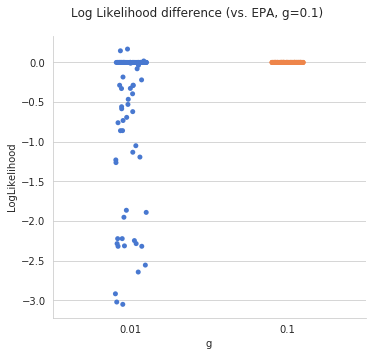

In [205]:
ax = sns.catplot(data=df_epa, x="g", y="LL difference", palette="muted")
ax.set_axis_labels("g", "LogLikelihood")
plt.subplots_adjust(left=0.1, top=0.9)
ax.fig.suptitle("Log Likelihood difference (vs. EPA, g=0.1)")

## Other software

Let's build this plot it for every tested software.

In [206]:
df2 = df.merge(baseline, left_on="query", right_on="query", suffixes=('', '_baseline'))
df2["LL difference"] = df2["LL"] - df2["LL_baseline"]
df2.head()

,pruning,g,query,length,LL,software,max-strikes,strike-box,max-pitches,red,ar,k,omega,LL_baseline,LL difference
0,0,0.01000,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39708.145904,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39705.898393,-2.247511
1,0,0.10000,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39705.898393,epa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39705.898393,0.000000
2,0,0.99900,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39709.165734,epang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39705.898393,-3.267341
3,0,0.99999,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39707.929337,epang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39705.898393,-2.030944
4,0,NaN,8f43808640b0e835dfd588c7c30a955c78cf2252-17084050,0,-39707.929337,pplacer,6.0,3.0,40.0,NaN,NaN,NaN,NaN,-39705.898393,-2.030944


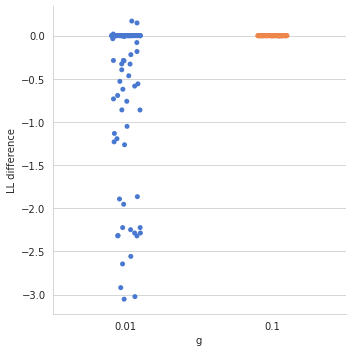

In [207]:
df_epa = df2[df2["software"] == "epa"]
sns.catplot(data=df_epa, x="g", y="LL difference", palette="muted")

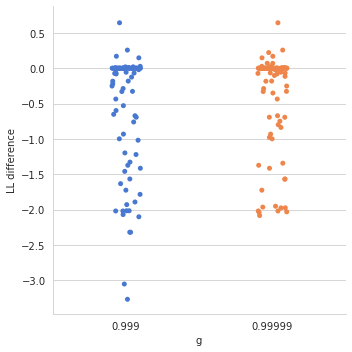

In [208]:
df_epang = df2[df2["software"] == "epang"]
sns.catplot(data=df_epang, x="g", y="LL difference", palette="muted")

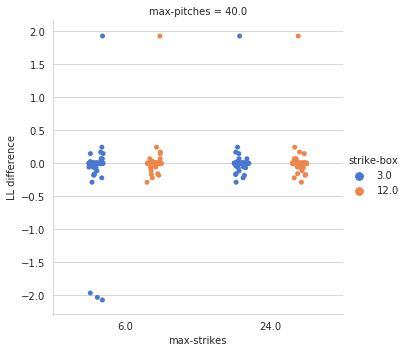

In [210]:
df_pplacer = df2[df2["software"] == "pplacer"]
sns.catplot(data=df_pplacer, x="max-strikes", row="max-pitches", hue="strike-box", y="LL difference", dodge=True, palette="muted")

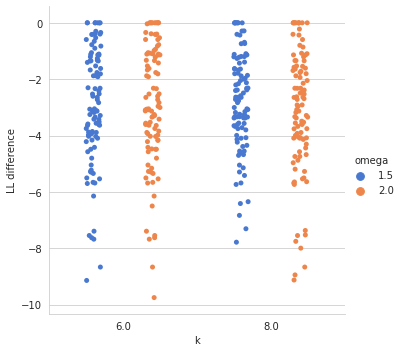

In [211]:
df_rappas = df2[df2["software"] == "rappas"]
sns.catplot(data=df_rappas, x="k", hue="omega", y="LL difference", dodge=True, palette="muted")

## Put it all together

Let's make a final plot, combining all the plots.

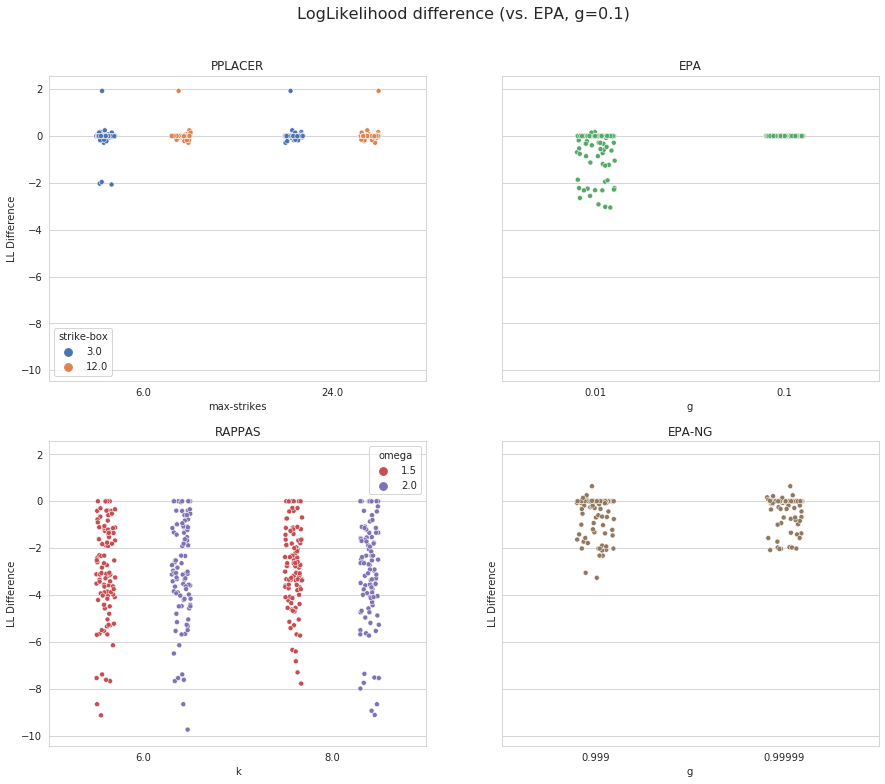

In [260]:
num_rows = 2
num_cols = 2
scale = 6
fig, axes = plt.subplots(num_rows, num_cols, sharey=True, figsize=(scale * 1.2 * num_cols, scale * num_rows))
plt.subplots_adjust(left=0.1, top=0.9)
fig.suptitle("LogLikelihood difference (vs. EPA, g=0.1)", fontsize=16)

palette = sns.color_palette("deep", 8)

k = 0
order = ["pplacer", "epa", "rappas", "epang"]
for i in range(num_rows):
    for j in range(num_cols):
        color = sns.color_palette()[j]
        
        if order[k] == "pplacer":
            ax = sns.stripplot(data=df_pplacer, x="max-strikes", hue="strike-box", y="LL difference", ax=axes[i, j],
                               linewidth=0.5, edgecolor='w', dodge=True, palette=palette[0:2])
            ylabel = 'LL Difference'
            title = f'PPLACER'
        elif order[k] == "epa":
            ax = sns.stripplot(data=df_epa, x="g", y="LL difference", ax=axes[i, j], 
                               linewidth=0.5, edgecolor='w', dodge=True, palette=palette[2:3])
            ylabel = ''
            title = f'EPA'
        elif order[k] == "rappas":
            ax = sns.stripplot(data=df_rappas, x="k", hue="omega", y="LL difference", ax=axes[i, j], 
                               linewidth=0.5, edgecolor='w', dodge=True, palette=palette[3:5])
            ylabel = 'LL Difference'
            title = f'RAPPAS'
        elif order[k] == "epang":
            ax = sns.stripplot(data=df_epang, x="g", y="LL difference", ax=axes[i, j], 
                               linewidth=0.5, edgecolor='w', dodge=True, palette=palette[5:6])
            title = f'EPA-NG'
        
        ax.set(ylabel=ylabel, title=title)
        k += 1
        
fig.savefig("ll_diff.png")
fig.savefig("ll_diff.svg")